<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/SRIMA(SeasonalAutoregressiveIntegratedMAAnalysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
! pip3 install pmdarima

In [2]:

import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab

from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/co2_mm_mlo.csv")


In [4]:
data.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [5]:
data.tail()

,year,month,decimal_date,average,interpolated
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00
728,2018,11,2018.875,408.02,408.02


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          729 non-null    int64  
 1   month         729 non-null    int64  
 2   decimal_date  729 non-null    float64
 3   average       722 non-null    float64
 4   interpolated  729 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 28.6 KB


In [7]:
# no date time column creating using year and month column
data['date'] = pd.to_datetime({'year': data['year'], 'month': data['month'], 'day':1})
data.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [8]:
data = data.set_index('date')
data.index.freq='MS'
data.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='date', length=729, freq='MS')

In [9]:
data.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [10]:
data[data['average'].isnull()]

,year,month,decimal_date,average,interpolated
date,,,,,
1958-06-01,1958,6,1958.458,NaN,317.10
1958-10-01,1958,10,1958.792,NaN,312.66
1964-02-01,1964,2,1964.125,NaN,320.07
1964-03-01,1964,3,1964.208,NaN,320.73
1964-04-01,1964,4,1964.292,NaN,321.77
1975-12-01,1975,12,1975.958,NaN,330.59
1984-04-01,1984,4,1984.292,NaN,346.84


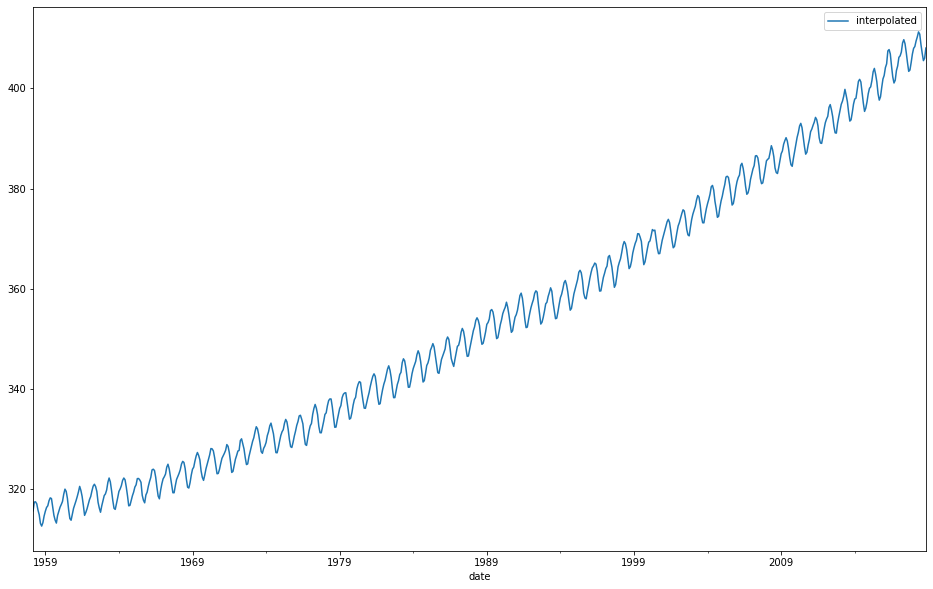

In [11]:
data['interpolated'].plot(figsize=(16,10), legend=True)

Text(0, 0.5, 'resid')

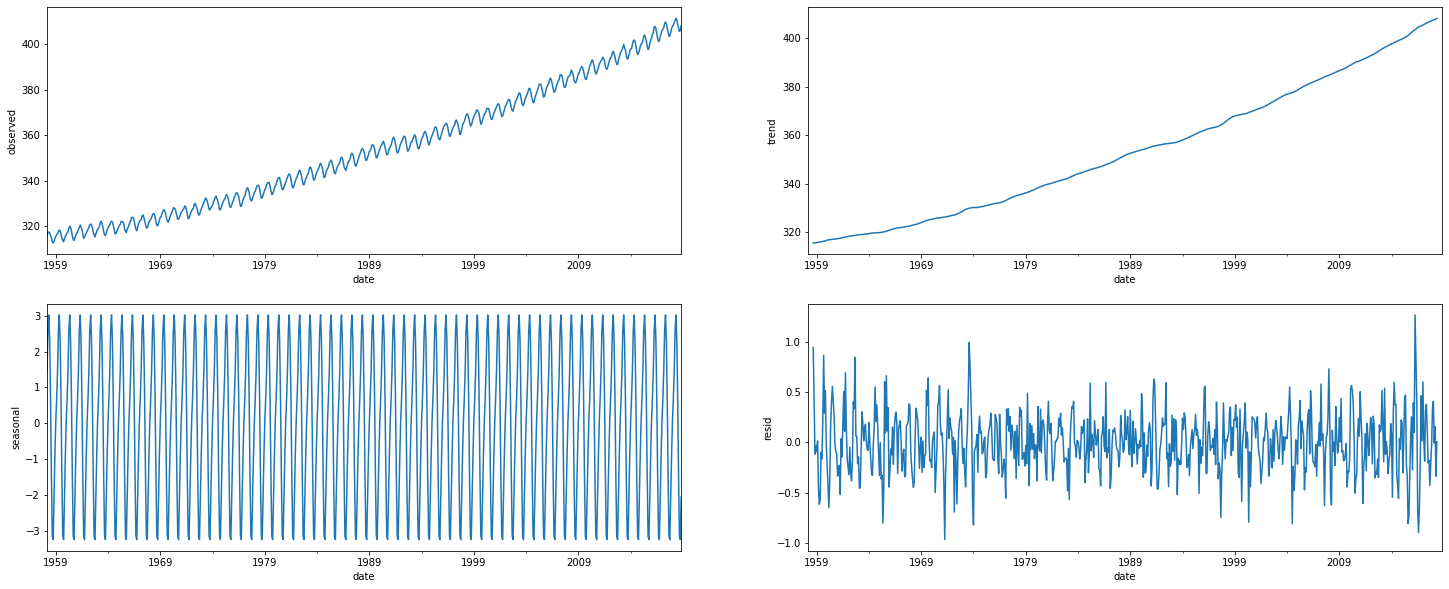

In [12]:
result = seasonal_decompose(data['interpolated'], model='add')
fig, axe = plt.subplots(2,2,figsize=(25,10))

result.observed.plot(ax=axe[0,0])
axe[0,0].set_ylabel("observed")

result.trend.plot(ax=axe[0,1])
axe[0,1].set_ylabel("trend")

result.seasonal.plot(ax=axe[1,0])
axe[1,0].set_ylabel("seasonal")

result.resid.plot(ax=axe[1,1])
axe[1,1].set_ylabel("resid")


In [13]:
auto_arima(data['interpolated'], seasonal=True, m=12)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=False)

In [14]:
auto_arima(data['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.252
Date:                            Mon, 16 Nov 2020   AIC                            424.505
Time:                                    05:31:40   BIC                            452.046
Sample:                                         0   HQIC                           435.132
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3510      0.083      4.212      0.000       0.188       0.514
ar.L2          0.0873      0.058      1.501      0.133      -0.027       0.201
ma.L1         -0.7060      0.088     -8.048      0.000      -0.878      -0.534
ar.S.L12       0.9996      0.000   2992.587      0.000       0.999       1.000
ma.S.L12      -0.8665      0.021    -40.618      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.438      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       43.76   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
train_data = data.iloc[:717]
test_data = data.iloc[717:]

In [16]:
model = SARIMAX(train_data['interpolated'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12))

In [17]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.889
Date:                            Mon, 16 Nov 2020   AIC                            415.778
Time:                                    05:31:43   BIC                            443.220
Sample:                                03-01-1958   HQIC                           426.374
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3481      0.091      3.813      0.000       0.169       0.527
ar.L2          0.0852      0.025      3.393      0.001       0.036       0.134
ma.L1         -0.7021      0.076     -9.210      0.000      -0.851      -0.553
ar.S.L12       0.9996      0.000   2845.631      0.000       0.999       1.000
ma.S.L12      -0.8655      0.023    -37.820      0.000      -0.910      -0.821
sigma2         0.0954      0.005     20.324      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       44.40   Jarque-Bera (JB):                 4.61
Prob(Q):                              0.29   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.01
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
prediction = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels').rename('SARIMA(2, 1, 1 Predication')

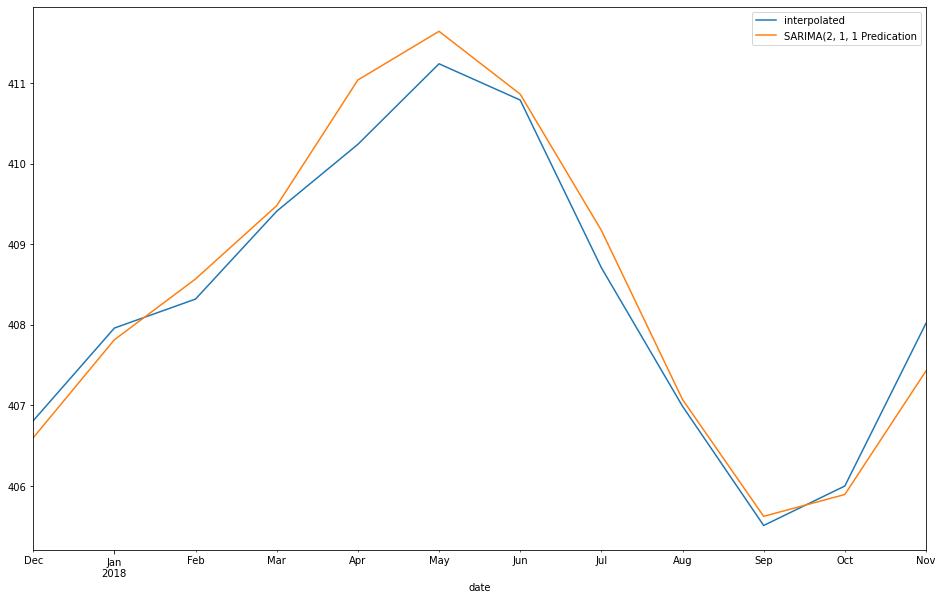

In [19]:
test_data['interpolated'].plot(figsize=(16,10), legend=True)
prediction.plot(legend=True)

In [20]:
error_result = rmse(test_data['interpolated'], prediction)
error_result

0.35756143314487643

In [21]:
test_data['interpolated'].mean()

408.3333333333333

**Forcast to future**

In [22]:
model = SARIMAX(data['interpolated'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12))

In [23]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.252
Date:                            Mon, 16 Nov 2020   AIC                            424.505
Time:                                    05:31:47   BIC                            452.046
Sample:                                03-01-1958   HQIC                           435.132
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3510      0.083      4.212      0.000       0.188       0.514
ar.L2          0.0873      0.058      1.501      0.133      -0.027       0.201
ma.L1         -0.7060      0.088     -8.048      0.000      -0.878      -0.534
ar.S.L12       0.9996      0.000   2992.587      0.000       0.999       1.000
ma.S.L12      -0.8665      0.021    -40.618      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.438      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       43.76   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
prediction = result.predict(start=len(data), end=len(data)+11, typ='levels').rename('SARIMA(2, 1, 1 Predication')

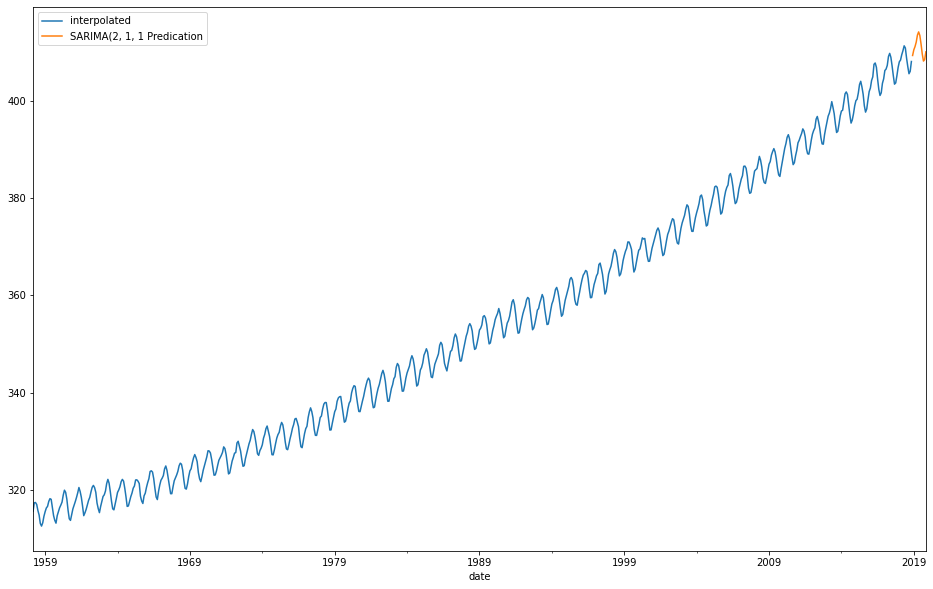

In [25]:
data['interpolated'].plot(figsize=(16,10), legend=True)
prediction.plot(legend=True)

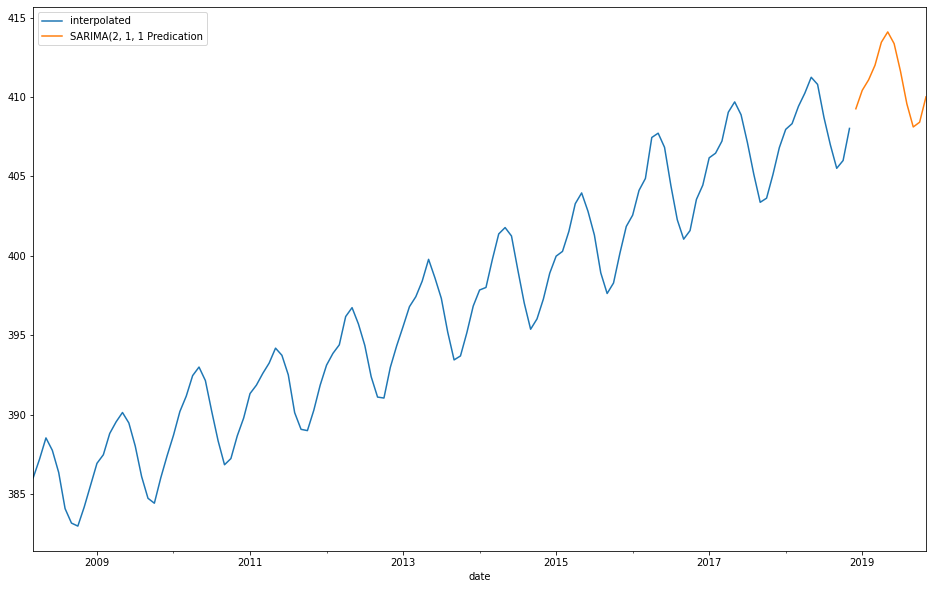

In [26]:
temp_data = data['interpolated'].iloc[600:]
temp_data.plot(figsize=(16,10), legend=True)
prediction.plot(legend=True)